# Cover Sheet


* **Student Name:** Harold Murillo
* **Subject Title:** Introduction to Data Mining



In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



# Assignment 

### 1. Implement Data Mining 

The following code uses a Wikipedia API where we will extract 6 articles from Wikipedia and perform simple text analysis

In [2]:
import requests
import pandas as pd

def get_wikipedia_content(title):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        
        "prop": "extracts",
        "exintro": True,
        "titles": title
    }
    response = requests.get(url, params=params)
    data = response.json()
    page = next(iter(data['query']['pages'].values()))

    return page ['title'], page['extract']

In [3]:
doc_1 = get_wikipedia_content("Microservices")
doc_2 = get_wikipedia_content("Test-driven development")
doc_3 = get_wikipedia_content("Ratio decidendi")
doc_4 = get_wikipedia_content("Alternative dispute resolution")
doc_5 = get_wikipedia_content("Super Smash Bros.")
doc_6 = get_wikipedia_content("Eudaimonia")

In [4]:
df = pd.DataFrame([doc_1, doc_2, doc_3, doc_4, doc_5, doc_6], columns=["title", "content"])
df

,title,content
0,Microservices,"<link rel=""mw-deduplicated-inline-style"" href=..."
1,Test-driven development,<p><b>Test-driven development</b> (<b>TDD</b>)...
2,Ratio decidendi,"<p>\n<i><b><span title=""Latin-language text""><..."
3,Alternative dispute resolution,"<p class=""mw-empty-elt"">\n</p>\n\n\n<link rel=..."
4,Super Smash Bros.,"<p class=""mw-empty-elt"">\n\n\n</p>\n\n<p><i><b..."
5,Eudaimonia,<p><b>Eudaimonia</b> (<span></span>; Ancient G...


### 2. Data processing 

The following code performs data processing to remove stop words, stemming, change to lowercase, remove non-essential words, and remove HTML tags.

In [5]:
import re 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem  import SnowballStemmer

nltk.download('punkt_tab') 
nltk.download('stopwords')



[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
def data_preprocessing (text):
    #to lowercase
    text = text.lower()

    #Remove HTML tags
    text = re.sub (r'<.*?>', '', text)

    # remove non-words 
    text = re.sub(r'\W', ' ', text)

    # tokenize the text
    tokens = word_tokenize(text)

    stemmer = SnowballStemmer('english') 
    tokens = [stemmer.stem(word) for word in tokens]
    # remove stop words 
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

d = df['content'].apply(data_preprocessing)

d

0    [softwar, engin, microservic, architectur, arc...
1    [test, driven, develop, tdd, way, write, code,...
2    [ratio, decidendi, us, latin, plural, ration, ...
3    [altern, disput, resolut, adr, extern, disput,...
4    [super, smash, bros, crossov, platform, fight,...
5    [eudaimonia, ancient, greek, εὐδαιμονία, eu, d...
Name: content, dtype: object

### 3. Document term Matrix


#### Calculate the DTM for each of the documents

In [7]:
# Creating  a Document - Term Matrix (DTM)

from sklearn.feature_extraction.text import CountVectorizer


# Covert list of tokens into a string corpus
corpus = [' '.join(doc) for doc in d]


#Initialize the Counttvectorizer
vectorizer = CountVectorizer()

#Fit and transfor the corpus to get the document Term Matrix(DTM)
dtm = vectorizer.fit_transform(corpus)

#Convert the DTM to DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

dtm_df

,12,1990s,1999,2001,2004,2008,2014,2018,2023,3ds,...,within,word,work,write,written,year,yoshi,zelda,ēthikē,εὐδαιμονία
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,6,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,2,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,1,1,0,1,1,1,0,3,...,0,0,0,0,0,0,1,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1


####  Display the top 10 most occuring words for each document

In [8]:
# Function to get top N words for each document
def get_top_n_words(df_row, feature_names, n=10):
    # Sort word frequencies for the document in descending order
    sorted_indices = df_row.argsort()[::-1][:n]
    top_words = [(feature_names[i], df_row[i]) for i in sorted_indices if df_row[i] > 0]
    return top_words

# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Loop through each document and display top 10 words
for idx, row in dtm_df.iterrows():
    print(f"Document {idx + 1} Top 10 Words:")
    top_words = get_top_n_words(row.to_numpy(), feature_names, n=10)
    for word, count in top_words:
        print(f"{word}: {count}")
    print('-' * 30)


Document 1 Top 10 Words:
codebas: 4
servic: 4
microservic: 3
architectur: 3
develop: 3
reduc: 3
implement: 2
softwar: 2
complex: 2
need: 2
------------------------------
Document 2 Top 10 Words:
test: 9
code: 9
write: 6
tdd: 3
product: 3
debug: 2
autom: 2
develop: 2
program: 2
befor: 2
------------------------------
Document 3 Top 10 Words:
court: 7
case: 6
decidendi: 6
legal: 5
ratio: 5
rule: 4
particular: 3
actual: 3
determin: 2
ration: 2
------------------------------
Document 4 Top 10 Words:
adr: 11
disput: 11
parti: 10
court: 8
mediat: 5
use: 5
ncdr: 5
settl: 4
resolut: 4
increas: 4
------------------------------
Document 5 Top 10 Words:
game: 10
super: 8
smash: 7
bros: 7
seri: 7
nintendo: 6
releas: 6
charact: 5
instal: 5
third: 4
------------------------------
Document 6 Top 10 Words:
ethic: 4
greek: 3
philosophi: 3
eudaimonia: 3
translat: 3
term: 2
virtu: 2
ancient: 2
good: 2
practic: 2
------------------------------


#### Pattern between the document

At this stage the pattern I can see is that documents 1-2 contains the word code, also,  in document 4 the words adr and dispute take up a lot of time in the document which makes there be less diversity in words. the other document contains a wide range of words making the document rich in reverse words.

### 4. Calculate the Term Frequency (TF) - Inverse Document Frequency (IDF) matrix


TF = (Frequency of words in a document) / (# words in a document) [ ]: # n

In [9]:

#Getting the frequency words in the articles
document_word_count = dtm_df.sum(axis=1)
document_word_count

0     88
1     84
2    126
3    228
4    210
5     85
dtype: int64

In [10]:
#Getting the TF matrix
tf = dtm_df.div (document_word_count, axis=0)
tf

,12,1990s,1999,2001,2004,2008,2014,2018,2023,3ds,...,within,word,work,write,written,year,yoshi,zelda,ēthikē,εὐδαιμονία
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.071429,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007937,0.007937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.004386,0.000000,0.000000,0.004386,0.008772,0.000000,0.000000,0.004386,0.000000,...,0.004386,0.000000,0.000000,0.000000,0.000000,0.004386,0.000000,0.000000,0.000000,0.000000
4,0.004762,0.000000,0.004762,0.004762,0.000000,0.004762,0.004762,0.004762,0.000000,0.014286,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004762,0.004762,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.011765,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.011765


### Get the IDF

##### IDF = Log[(# Documents)] / (Number of documents containing the word)

In [11]:
# N number of documents 
N = d.shape[0] 
N

6

In [12]:
binary_dtm = (dtm_df > 0)
doc_count_per_term = binary_dtm.sum(axis=0)

In [13]:
doc_count_per_term[400:450]

success       1
super         1
switch        1
system        2
take          1
tdd           1
team          1
techniqu      2
term          1
test          1
text          1
therebi       1
therefor      1
third         2
thought       1
thus          1
time          2
togeth        1
tool          1
tournament    1
tradit        3
transact      1
transform     1
translat      1
treat         1
tri           2
trust         1
turn          1
two           1
type          1
typic         1
ultim         1
uniqu         1
unit          1
unlik         1
unwil         1
us            1
use           2
varieti       1
various       1
video         1
virtu         1
wale          1
way           2
welfar        1
well          2
whether       2
wide          1
widespread    1
wii           1
dtype: int64

In [14]:
import numpy as np 
idf = np.log(N / doc_count_per_term)

In [15]:
idf[400:450]

success       1.791759
super         1.791759
switch        1.791759
system        1.098612
take          1.791759
tdd           1.791759
team          1.791759
techniqu      1.098612
term          1.791759
test          1.791759
text          1.791759
therebi       1.791759
therefor      1.791759
third         1.098612
thought       1.791759
thus          1.791759
time          1.098612
togeth        1.791759
tool          1.791759
tournament    1.791759
tradit        0.693147
transact      1.791759
transform     1.791759
translat      1.791759
treat         1.791759
tri           1.098612
trust         1.791759
turn          1.791759
two           1.791759
type          1.791759
typic         1.791759
ultim         1.791759
uniqu         1.791759
unit          1.791759
unlik         1.791759
unwil         1.791759
us            1.791759
use           1.098612
varieti       1.791759
various       1.791759
video         1.791759
virtu         1.791759
wale          1.791759
way        

### Calculate TF-IDF

In [16]:

#Create a diagonal matrix from the IDF values
idf_diag = np.diag(idf) 
#Multiply the TF matrix by the diagonal IDF matrix
tf_idf = tf.dot(idf_diag) 
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,451,452,453,454,455,456,457,458,459,460
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015753,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
1,0.000000,0.000000,0.013079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.127983,0.02133,0.000000,0.000000,0.000000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.005501,0.008719,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000
3,0.000000,0.007859,0.000000,0.000000,0.007859,0.009637,0.000000,0.000000,0.007859,0.000000,...,0.003040,0.000000,0.00000,0.000000,0.00000,0.007859,0.000000,0.000000,0.00000,0.00000
4,0.008532,0.000000,0.005231,0.008532,0.000000,0.005231,0.008532,0.008532,0.000000,0.025597,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.008532,0.008532,0.00000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.012925,0.02108,0.000000,0.00000,0.000000,0.000000,0.000000,0.02108,0.02108


#### Patters between the documents

At this stage the pattern I can see is that most words appear moderately between 1 to 2 according to the general IDF value guideline. For example, the word "Super" is shown above appearing 1.791759, suggesting that it is rare in the document corpus, making it uncommon.

### 5. Clustering

#### Applying  K-means to group the articles based on their content

#### Choosing the number of clusters

For calculating the number of cluster we  are goind to use the Elbow method which is a graphical method for finding the optimal K value in a k-means clustering algorithm. The elbow graph shows the within-cluster-sum-of-square (WCSS) values on the y-axis corresponding to the different values of K (on the x-axis). The optimal K value is the point at which the graph forms an elbow.(Tomar, 2023). 

According to the definition explained above, the optimal k values ​​in the graph are 2 because there is a significant decrease in wcss from 2 to 3 and the line stars flatten slightly after 3.


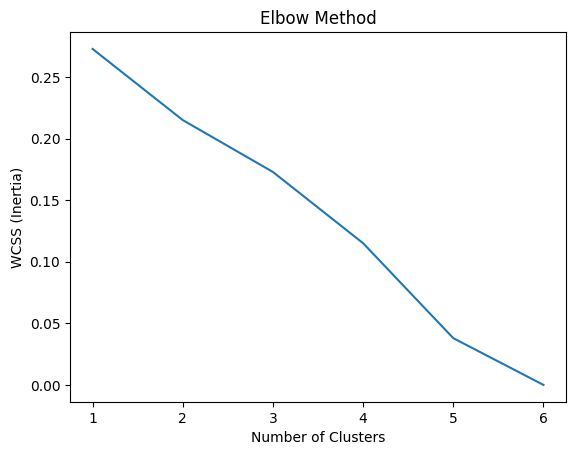

In [40]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 7):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tf_idf)
    wcss.append(km.inertia_)

# Plot the results
plt.plot(range(1, 7), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()


In [37]:
from sklearn.cluster import KMeans
num_clusters = 2
km = KMeans (n_clusters=num_clusters) 
km.fit(tf_idf)

KMeans(n_clusters=2)

In [34]:
clusters = km.labels_

In [27]:
df2 = df[['title']]

In [35]:
df2['clusters'] = clusters

In [29]:
df2

,title
0,Microservices
1,Test-driven development
2,Ratio decidendi
3,Alternative dispute resolution
4,Super Smash Bros.
5,Eudaimonia


### 6.Visualisation 

In [30]:
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2) 
pca_result = pca.fit_transform(np.array(tf_idf))

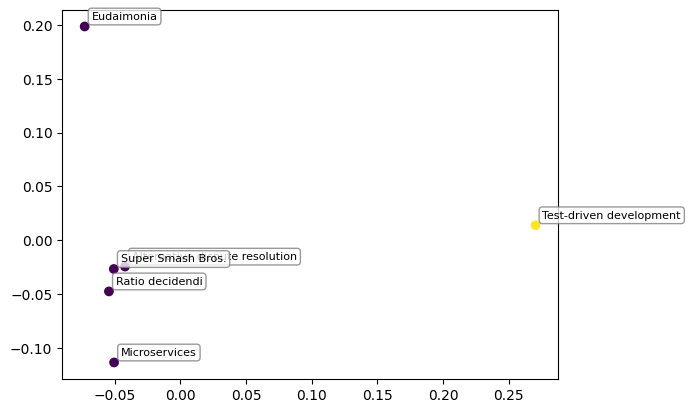

In [36]:
plt.scatter(pca_result[:, 0], 
    pca_result[:, 1], 
    c=clusters, marker='o')

for i, (x, y) in enumerate(pca_result):
    plt.annotate(df2['title'].iloc[i], (x, y), xytext=(5, 5), 
                 textcoords='offset points', fontsize=8, 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))



### 7.Interpretation 

According to the above graph, my interpretation is that there are 2 distinct groups of clusters, which are shown by the colors purple and yellow. In the purple cluster we can see that there are 4 items like Microservices, Ratio decidendi, Super Smachs Bros, Alternative Dispute Resolution and Eudomania. On the other yellow side we have only Test Driven Development.

These patterns suggest that the purple cluster has similar words and the yellow cluster has different words. Eudaimonia is clearly separated from the center of the cluster, suggesting that it contains some unique words but is still similar to the purple cluster.

In conclusion, even though I chose topics that are in my opinion different from philosophy, video games, legal terms, and software development, they share some common patterns in the words that are used to express their definition.

### 8. References

Tomar, A. (2023, August 2). Stop Using Elbow Method in K-means Clustering. Built In. Retrieved September 21, 2024, from https://builtin.com/data-science/elbow-method

